# Analysis of ProB native backend

This is the analysis of how the ProB native backend (CLPFD) behaves on different subsets of the problem domain (i.e. the B language).
The dataset contains 185 features collected over the AST of the respective B constraints.

In [6]:
import pandas as pd
import numpy as np

data = pd.read_csv('data/2019-12-04/prob-185_sorted-unique.csv')
data.head()

,Feature0,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,...,Feature176,Feature177,Feature178,Feature179,Feature180,Feature181,Feature182,Feature183,Feature184,Label0
0,0.011834,0.005917,0.005917,0.999999,-0.497041,0.497041,0.005917,0.0,0.005917,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.011834,0.011834,0.005917,0.500000,-0.994083,0.994083,0.005917,0.0,0.005917,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.017361,0.003472,0.003472,0.999999,-0.885417,1.121528,0.163194,0.0,0.399306,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.017544,0.008772,0.008772,0.999999,-0.736842,0.736842,0.008772,0.0,0.008772,0.017544,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.017544,0.008772,0.008772,0.999999,-0.956140,0.956140,0.008772,0.0,0.008772,0.017544,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


## Data insights

Firstly, we check how many positive and negative samples exist in the data.

In [17]:
sample_count = len(data)
positive = data[data["Label0"] == 1]
negative = data[data["Label0"] == 0]

print("We have %d samples in the dataset." % sample_count)
print("For %d of these, ProB is able to find a solution (%0.3f%%)" % (len(positive), len(positive)/sample_count))
print("For %d of these, ProB is _not_ able to find a solution (%0.3f%%)" % (len(negative), len(negative)/sample_count))

We have 106230 samples in the dataset.
For 95750 of these, ProB is able to find a solution (0.901%)
For 10480 of these, ProB is _not_ able to find a solution (0.099%)


Text(0, 0.5, '# Samples')

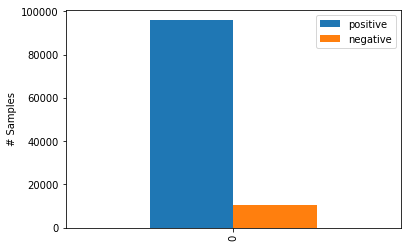

In [66]:
%matplotlib inline

class_balance = pd.DataFrame(data={"positive": [len(positive)], "negative": [len(negative)]})
class_balance_plot = class_balance.plot(kind="bar")
class_balance_plot.set_ylabel("# Samples")

Now we will inspect how often each feature is used in the data in the first place. Thus we can evaluate how much significance each evaluation over the subdomains has.

In [22]:
feature_uses = np.count_nonzero(data, axis=0)
rel_feature_uses = feature_uses/sample_count

In [30]:
fd = {}
for f in range(185):
    fd["Feature%d" % f] = [feature_uses[f]]
feature_data = pd.DataFrame(data=fd)
feature_data

,Feature0,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,...,Feature175,Feature176,Feature177,Feature178,Feature179,Feature180,Feature181,Feature182,Feature183,Feature184
0,106230,88271,88271,88271,98662,75919,88446,18776,106152,36224,...,34,873,206,0,136,8,2,0,545,22


In [32]:
# We also calculate the relative amount of feature uses.
fd = {}
for f in range(185):
    fd["Feature%d" % f] = [rel_feature_uses[f]]
rel_feature_data = pd.DataFrame(data=fd)
rel_feature_data

,Feature0,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,...,Feature175,Feature176,Feature177,Feature178,Feature179,Feature180,Feature181,Feature182,Feature183,Feature184
0,1.0,0.830942,0.830942,0.830942,0.928758,0.714666,0.83259,0.176749,0.999266,0.340996,...,0.00032,0.008218,0.001939,0.0,0.00128,0.000075,0.000019,0.0,0.00513,0.000207


In [44]:
zero_cols = feature_data.loc[:, (feature_data == 0).any(axis=0)]
full_cols = feature_data.loc[:, (feature_data == sample_count).any(axis=0)]

# Group into percentages
p05_cols = rel_feature_data.loc[:, ((rel_feature_data > 0) & (rel_feature_data <= 0.05)).any(axis=0)]
p20_cols = rel_feature_data.loc[:, ((rel_feature_data > 0.05) & (rel_feature_data <= 0.2)).any(axis=0)]
p35_cols = rel_feature_data.loc[:, ((rel_feature_data > 0.2) & (rel_feature_data <= 0.35)).any(axis=0)]
p50_cols = rel_feature_data.loc[:, ((rel_feature_data > 0.35) & (rel_feature_data <= 0.5)).any(axis=0)]
p75_cols = rel_feature_data.loc[:, ((rel_feature_data > 0.5) & (rel_feature_data <= 0.75)).any(axis=0)]
p100_cols = rel_feature_data.loc[:, ((rel_feature_data > 0.75) & (rel_feature_data < 1)).any(axis=0)]

### Summary

In [49]:
print("There are %d features which are never used in the data:" % len(list(zero_cols)), list(zero_cols))
print("There are %d features which are used only in 5%% of the data:" % len(list(p05_cols)), list(p05_cols))
print("There are %d features which are used only in 5-20%% of the data:" % len(list(p20_cols)), list(p20_cols))
print("There are %d features which are used only in 20-35%% of the data:" % len(list(p35_cols)), list(p35_cols))
print("There are %d features which are used only in 35-50%% of the data:" % len(list(p50_cols)), list(p50_cols))
print("There are %d features which are used only in 50-75%% of the data:" % len(list(p75_cols)), list(p75_cols))
print("There are %d features which are used only in 75-100%% of the data:" % len(list(p100_cols)), list(p100_cols))
print("There are %d features which are used in each constraint:" % len(list(full_cols)), list(full_cols))


There are 10 features which are never used in the data: ['Feature63', 'Feature77', 'Feature152', 'Feature153', 'Feature161', 'Feature165', 'Feature169', 'Feature170', 'Feature178', 'Feature182']
There are 87 features which are used only in 5% of the data: ['Feature10', 'Feature23', 'Feature30', 'Feature37', 'Feature38', 'Feature40', 'Feature41', 'Feature42', 'Feature43', 'Feature47', 'Feature48', 'Feature50', 'Feature51', 'Feature52', 'Feature53', 'Feature58', 'Feature59', 'Feature64', 'Feature65', 'Feature66', 'Feature67', 'Feature68', 'Feature78', 'Feature79', 'Feature80', 'Feature81', 'Feature82', 'Feature83', 'Feature85', 'Feature86', 'Feature88', 'Feature92', 'Feature93', 'Feature94', 'Feature97', 'Feature98', 'Feature99', 'Feature102', 'Feature103', 'Feature106', 'Feature108', 'Feature112', 'Feature113', 'Feature114', 'Feature117', 'Feature118', 'Feature119', 'Feature122', 'Feature123', 'Feature126', 'Feature128', 'Feature132', 'Feature133', 'Feature134', 'Feature135', 'Feature13

Text(0, 0.5, '% Percentage')

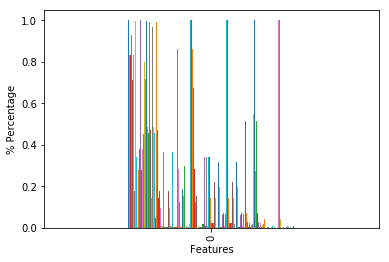

In [56]:
rel_feature_plot = rel_feature_data.plot(kind="bar",legend=None)
rel_feature_plot.set_xlabel("Features")
rel_feature_plot.set_ylabel("% Percentage")

By taking the mean values over the respective ground truths, we can infer some information alread.

In [71]:
data.groupby("Label0").mean()

,Feature0,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,...,Feature175,Feature176,Feature177,Feature178,Feature179,Feature180,Feature181,Feature182,Feature183,Feature184
Label0,,,,,,,,,,,,,,,,,,,,,
0,1.755806,0.340443,0.287682,0.559232,26.505638,1.454835,4.018525,0.390720,32.369717,2.068335,...,0.001622,0.004771,0.003220,0.0,0.001240,0.000000,0.000000,0.0,0.003096,0.000620
1,1.216280,0.478940,0.372724,0.711640,6.759599,2.100983,1.905493,0.191821,10.957896,1.406213,...,0.000125,0.008386,0.001717,0.0,0.001285,0.000084,0.000021,0.0,0.003232,0.000089


## Decision Trees

Let's run a quick check how good a decision tree can perform on the data.

### Prepare the training and test data

In [75]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size = 0.2)
train_x = train[train.columns[0:185]]
train_y = train["Label0"]

test_x = test[test.columns[0:185]]
test_y = test["Label0"]

### Train and evaluate the tree

In [104]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

tree = DecisionTreeClassifier(class_weight="balanced")

tree.fit(train_x, train_y)

DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [122]:
from sklearn import metrics

train_acc = metrics.accuracy_score(tree.predict(train_x), train_y)
test_acc = metrics.accuracy_score(tree.predict(test_x), test_y)
print("Train accuracy: %0.3f; test accuracy: %0.3f" % (train_acc, test_acc))

train_bacc = metrics.balanced_accuracy_score(tree.predict(train_x), train_y)
test_bacc = metrics.balanced_accuracy_score(tree.predict(test_x), test_y)
print("Train balanced accuracy: %0.3f; test balanced accuracy: %0.3f" % (train_bacc, test_bacc))

train_prec = metrics.precision_score(tree.predict(train_x), train_y)
test_prec = metrics.precision_score(tree.predict(test_x), test_y)
print("Train precision: %0.3f; test precision: %0.3f" % (train_prec, test_prec))

train_rec = metrics.recall_score(tree.predict(train_x), train_y)
test_rec = metrics.recall_score(tree.predict(test_x), test_y)
print("Train recall: %0.3f; test recall: %0.3f" % (train_rec, test_rec))

train_f1 = metrics.f1_score(tree.predict(train_x), train_y)
test_f1 = metrics.f1_score(tree.predict(test_x), test_y)
print("Train F1: %0.3f; test F1: %0.3f" % (train_f1, test_f1))

Train accuracy: 0.989; test accuracy: 0.915
Train balanced accuracy: 0.950; test balanced accuracy: 0.768
Train precision: 0.988; test precision: 0.953
Train recall: 1.000; test recall: 0.953
Train F1: 0.994; test F1: 0.953


In [111]:
from sklearn.metrics import confusion_matrix

test_pred = tree.predict(test_x)

cmtx = confusion_matrix(test_y, test_pred)
tn, fp, fn, tp = cmtx.ravel()

print("True positives", tp)
print("False positives", fp)
print("True negatives", tn)
print("False negatives", fn)

True positives 18184
False positives 891
True negatives 1265
False negatives 906


We see that the recall on the negative class is quite bad, being below 60% (1265 / (1265 + 891) = 0.5867). But why is that?
Partly, this can be due to the sheer class imbalance we observed in the beginning.